In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

# Question: Do Wildfires in seaside counties and inland counties burn the same acres?

### How to answer this question?

#### Using difference of two means to answer the question. 

- Step1: To Divide into two groups with seaside counties and inland counties.


- Step2: To make a Hypothesis.

```
α = 0.05

H0: μ(seaside) - μ(inland) = 0
The mean of burned acres of seaside group = TThe mean of burned acres of inland group; 

Ha: μ(seaside) - μ(inland) ！= 0
The mean of burned acres of seaside group != TThe mean of burned acres of inland group; 
```

- Step3: To create the null distribution
    - Repeat selecting the seaside group and the inland group 1000 times randomly.
    - Record (the mean of burned acres of seaside group - the mean of burned acres of control group) 1000 times
    - Draw a null distribution chart


- Step4: To check the hypothesis


- Reference

https://www.kaggle.com/ananthu017/california-wildfire-incidents-20132020



In [3]:
# load the seaside and inland data set
#seaside_inland_df = pd.read_csv(r'D:\yeshiva\2 semester\math\final\data\California_Fire_Incidents_with_income_selected_areas.csv')

seaside_inland_df = pd.read_csv(r'https://raw.githubusercontent.com/Yuehao-Wang/DAV-5300/main/final/data/California_Fire_Incidents_with_income_selected_areas.csv')

In [4]:
seaside_inland_df.shape

(1636, 43)

In [6]:
seaside_inland_df.head(2)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,median_income,median_income_level,seaside_inland
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN,56493.0,2,inland
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN,64251.0,3,seaside


In [7]:
# to get the sub data set
seaside_inland_sub_df = seaside_inland_df[['AcresBurned', 'Counties', 'seaside_inland'] ]
seaside_inland_sub_df.head(2)

,AcresBurned,Counties,seaside_inland
0,257314.0,Tuolumne,inland
1,30274.0,Los Angeles,seaside


# 1) EDA of sub-set of Seaside and Inland Wildfires

In [8]:
seaside_inland_sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AcresBurned     1633 non-null   float64
 1   Counties        1636 non-null   object 
 2   seaside_inland  1632 non-null   object 
dtypes: float64(1), object(2)
memory usage: 38.5+ KB


In [9]:
# To see data types
seaside_inland_sub_df.dtypes

AcresBurned       float64
Counties           object
seaside_inland     object
dtype: object

In [10]:
# To select the appropriate dtypes
seaside_inland_sub_df = seaside_inland_sub_df.convert_dtypes()
seaside_inland_sub_df.dtypes

AcresBurned        Int64
Counties          string
seaside_inland    string
dtype: object

### Selecting Appropriate Plots
|column|data type| categore | chart |
| :--- | :--- | :--- | :--- |
|AcresBurned    | Int64| Number |boxplot, barchar|
|Counties       | string| Categorical |boxplot, barchar|
|seaside_inland | string| Categorical |boxplot, barchar|


### Attribution description

|column|description |
| :--- | :--- |
| AcresBurned| Acres of land affected by wildfires |
| Counties| County name |
| seaside_inland| This county is seaside or inland |

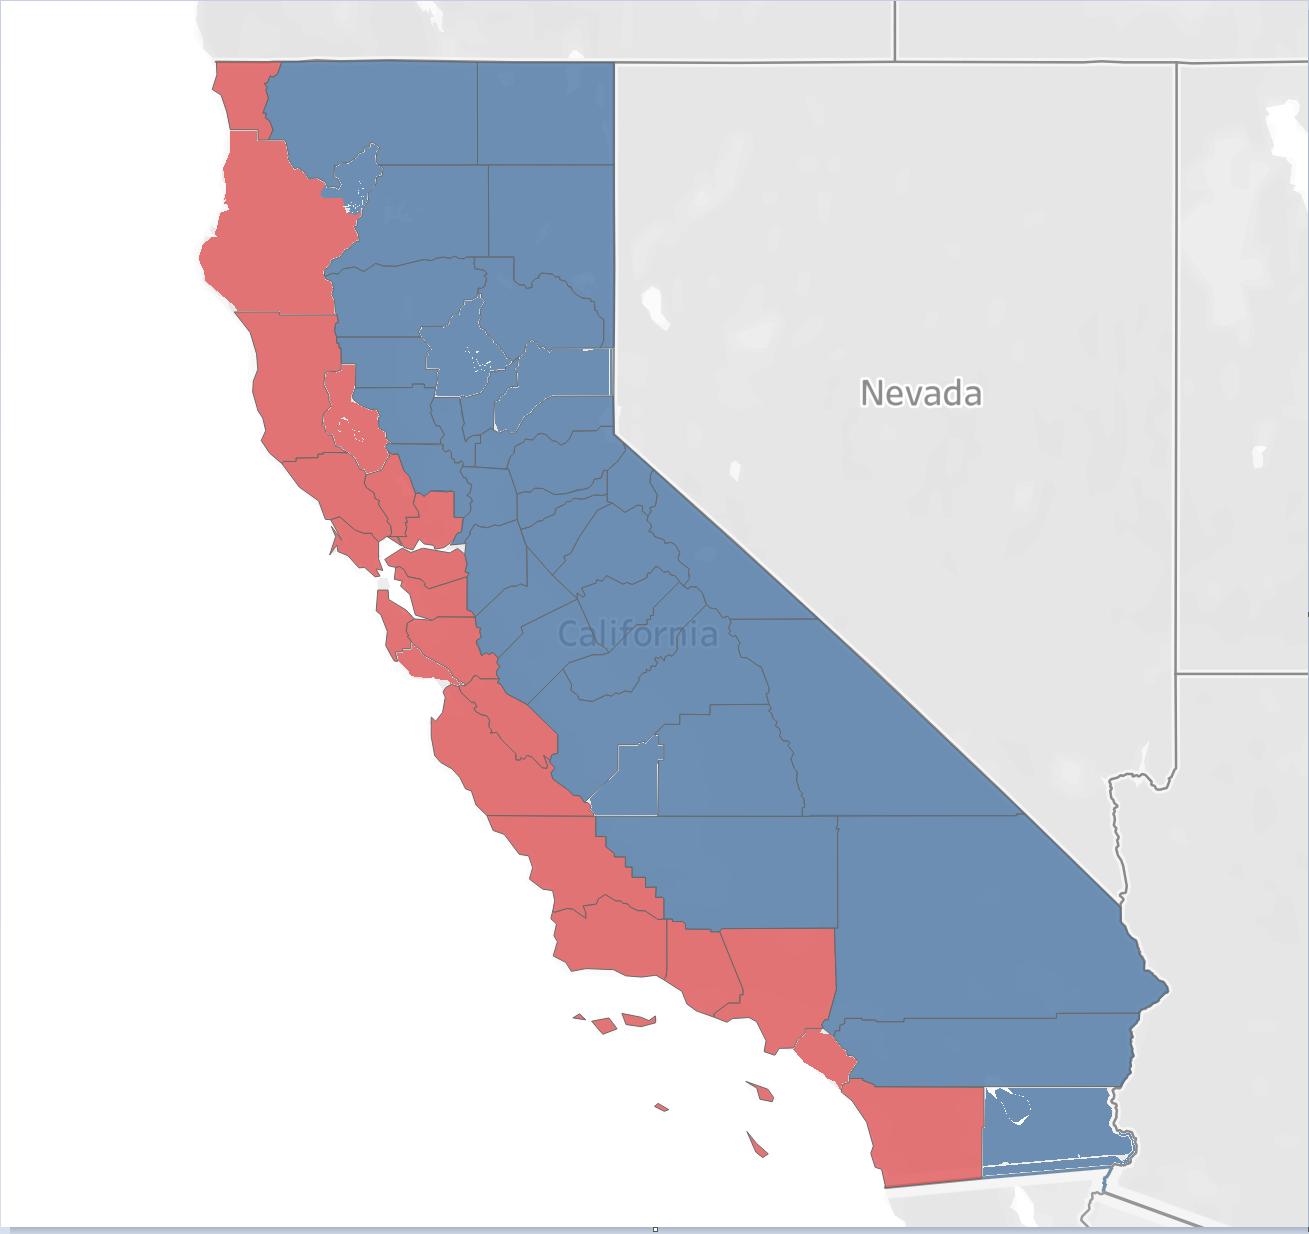

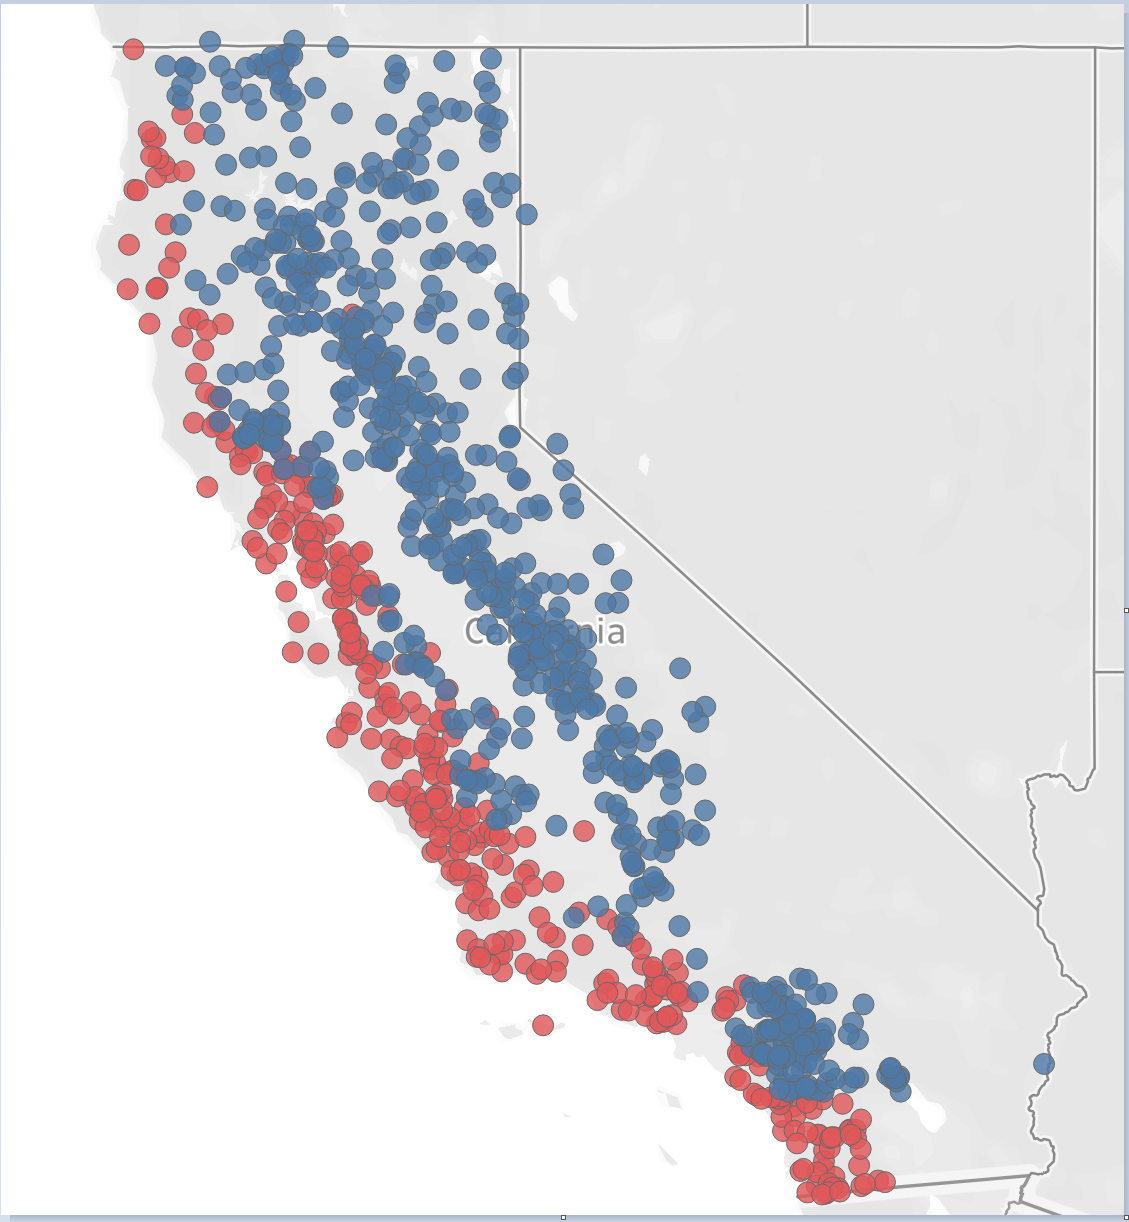

In [11]:
# Using describe to show the data set
seaside_inland_sub_df.describe()

,AcresBurned
count,1633.000000
mean,4589.443968
std,27266.337722
min,0.000000
25%,35.000000
50%,100.000000
75%,422.000000
max,410203.000000


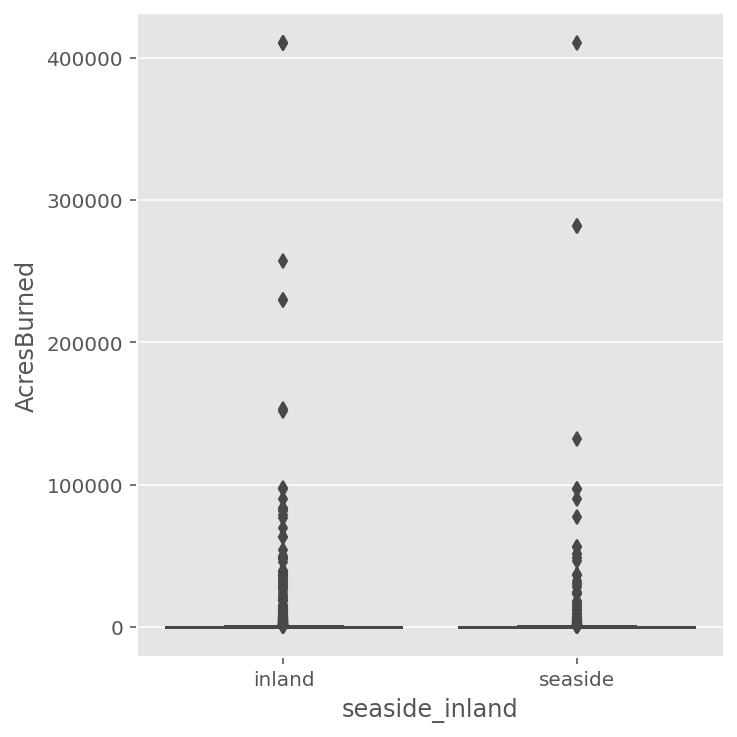

In [12]:
# Using box plot to show the AcresBurned
sns.catplot(x="seaside_inland", y="AcresBurned", kind="box", data=seaside_inland_sub_df)

The AresBurned has many outliers.

<AxesSubplot:xlabel='seaside_inland'>

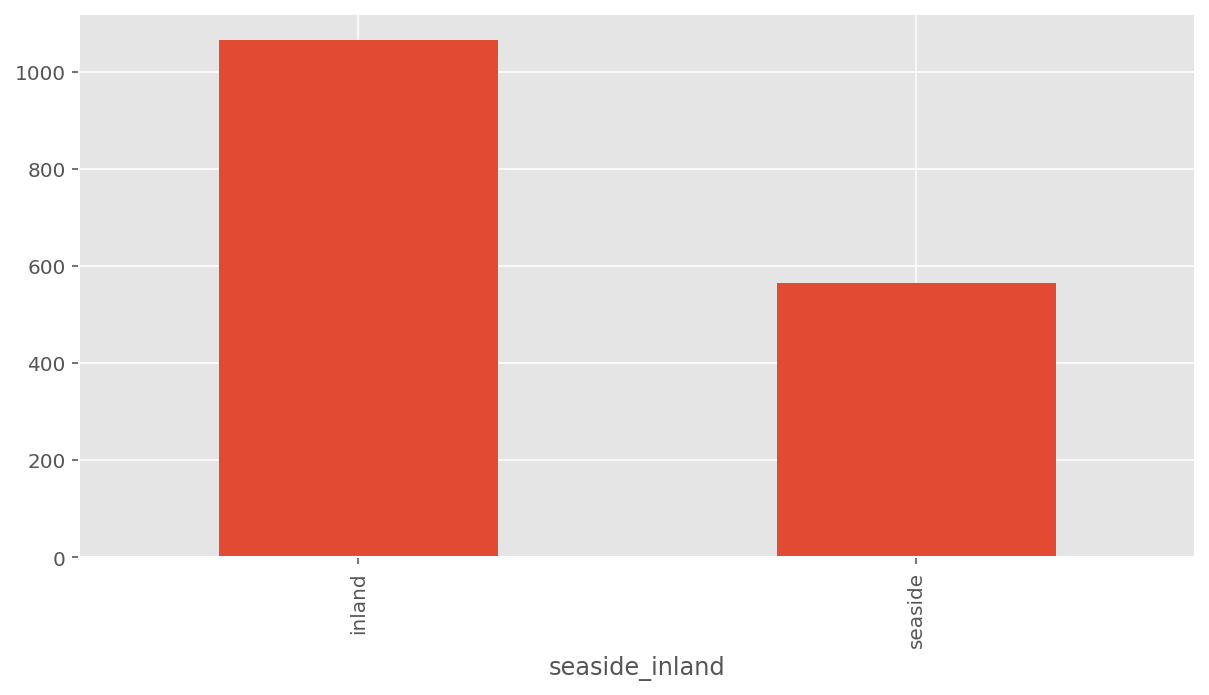

In [15]:
seaside_inland_sub_bar_df = seaside_inland_sub_df[['seaside_inland']].groupby('seaside_inland').size()
seaside_inland_sub_bar_df.plot.bar()

In [16]:
seaside_inland_sub_bar_df

seaside_inland
inland     1067
seaside     565
dtype: int64

# 2) Using Difference of two means to analyze question

- Step1: To Divide into two groups with seaside counties and inland counties.


- Step2: To make a Hypothesis.

```
α = 0.05

H0: μ(seaside) - μ(inland) = 0
The mean of burned acres of seaside group = The mean of burned acres of inland group; 

Ha: μ(seaside) - μ(inland) ！= 0
The mean of burned acres of seaside group != The mean of burned acres of inland group; 
```

- Step3: To create the null distribution
    - Repeat selecting the seaside group and the inland group 1000 times randomly.
    - Record (the mean of burned acres of seaside group - the mean of burned acres of control group) 1000 times
    - Draw a null distribution chart


- Step4: To check the hypothesis

We have finished the Step1 and Step2. We will solve the Step3.

#### Step3 To create the null distribution

In [11]:
def cal_diff_mean(seaside_inland_sub_df, sample_size = 30):
    mean_seaside_lst = []
    mean_inland_lst = []
    diff_mean_lst = []

    for i in range(1000):
        seaside_sample = seaside_inland_sub_df[seaside_inland_sub_df['seaside_inland'] == 'seaside'].sample(n=30)
        inland_sample = seaside_inland_sub_df[seaside_inland_sub_df['seaside_inland'] == 'inland'].sample(n=30)

        mean_seaside = seaside_sample['AcresBurned'].mean()
        mean_seaside_lst.append(mean_seaside)

        mean_inland = inland_sample['AcresBurned'].mean()
        mean_inland_lst.append(mean_inland)

        diff_mean = mean_seaside - mean_inland
        diff_mean_lst.append(diff_mean)
    
    return mean_seaside_lst, mean_inland_lst, diff_mean_lst



In [12]:
sample_size = 30
mean_seaside_lst, mean_inland_lst, diff_mean_lst = cal_diff_mean(seaside_inland_sub_df, sample_size)

In [13]:
# create df
mean_seaside_df = pd.DataFrame(mean_seaside_lst, columns=['seaside_mean'])
mean_seaside_df.head(2)

,seaside_mean
0,3072.700000
1,487.033333


In [14]:
# create df
mean_inland_df = pd.DataFrame(mean_inland_lst, columns=['inland_mean'])
mean_inland_df.head(2)

,inland_mean
0,748.800000
1,206.866667


In [29]:
# create df
diff_mean_df = pd.DataFrame(diff_mean_lst, columns=['diff_mean: sample size is 30'])
diff_mean_df.head(2)

,diff_mean: sample size is 30
0,-329.5
1,574.7


<Figure size 576x432 with 0 Axes>

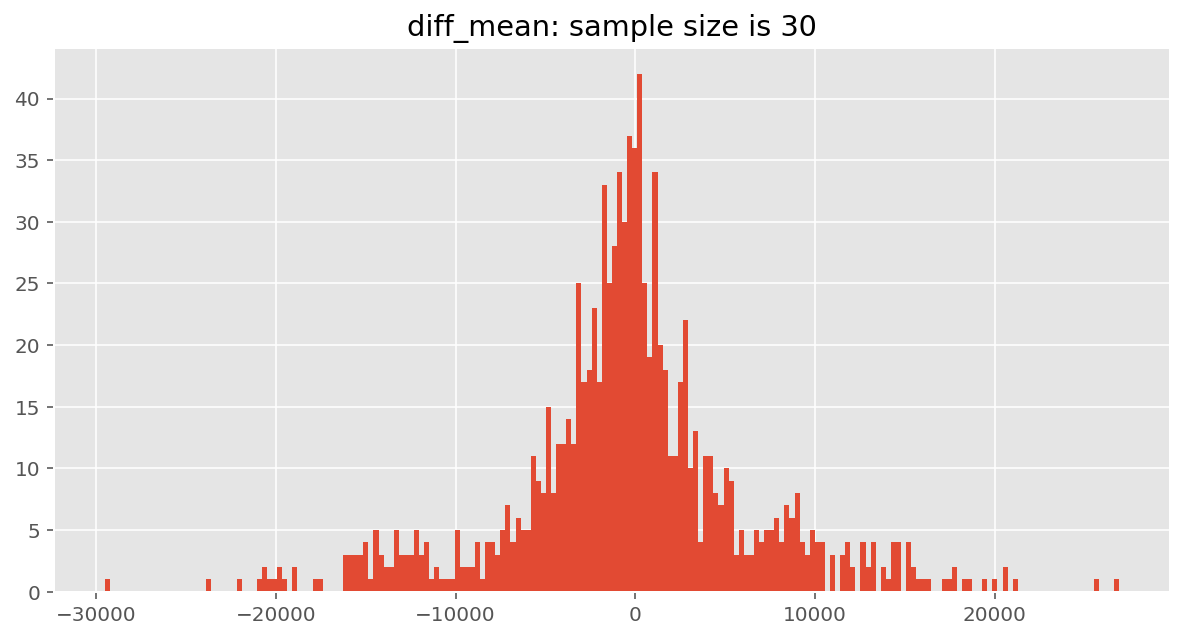

In [30]:
# To draw a null distribution chart
fig = plt.figure(figsize=(8, 6))
diff_mean_df.hist(bins=200)
plt.show()

<Figure size 576x432 with 0 Axes>

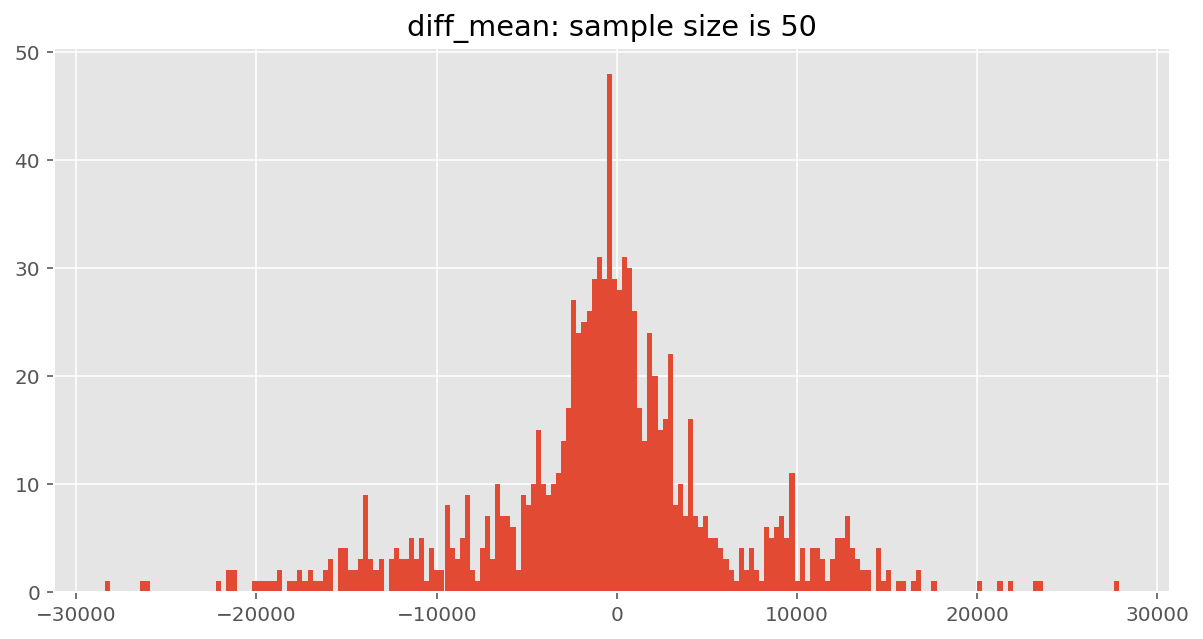

In [17]:
mean_seaside_lst, mean_inland_lst, diff_mean_lst = cal_diff_mean(seaside_inland_sub_df, 50)
diff_mean_df = pd.DataFrame(diff_mean_lst, columns=['diff_mean: sample size is 50'])
fig = plt.figure(figsize=(8, 6))
diff_mean_df.hist(bins=200)
plt.show()

<Figure size 576x432 with 0 Axes>

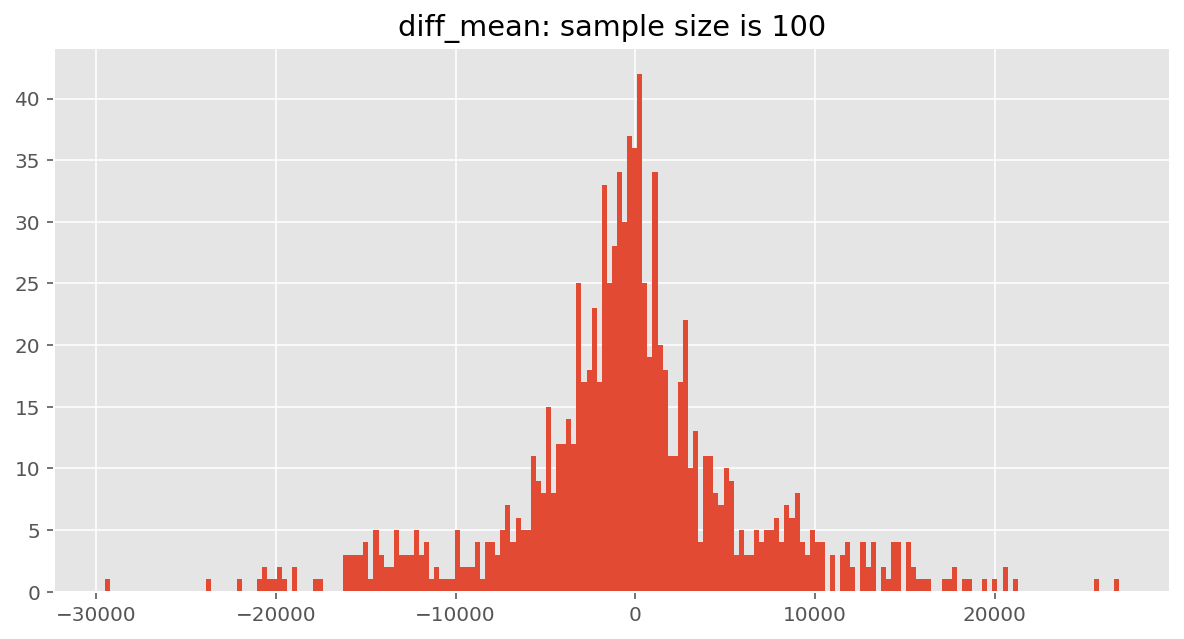

In [18]:
mean_seaside_lst, mean_inland_lst, diff_mean_lst = cal_diff_mean(seaside_inland_sub_df, 100)
diff_mean_df = pd.DataFrame(diff_mean_lst, columns=['diff_mean: sample size is 100'])
fig = plt.figure(figsize=(8, 6))
diff_mean_df.hist(bins=200)
plt.show()

#### Step4 To check the hypothesis

#### Step4.1) get standard deviation for each group

In [19]:
seaside_sample = seaside_inland_sub_df[seaside_inland_sub_df['seaside_inland'] == 'seaside']
inland_sample = seaside_inland_sub_df[seaside_inland_sub_df['seaside_inland'] == 'inland']
seaside_sample.describe()

,AcresBurned
count,564.000000
mean,4380.812057
std,26496.293334
min,0.000000
25%,35.000000
50%,99.000000
75%,356.750000
max,410203.000000


In [20]:
inland_sample.describe()

,AcresBurned
count,1065.000000
mean,4713.414085
std,27726.606176
min,0.000000
25%,35.000000
50%,100.000000
75%,464.000000
max,410203.000000


In [21]:
# 1) get standard deviation and mean for each group

standard_deviation_seaside = seaside_sample['AcresBurned'].std()
print("standard deviation of seaside is %.4f" %standard_deviation_seaside)

standard_deviation_inland = inland_sample['AcresBurned'].std()
print("standard deviation of inland is %.4f" %standard_deviation_inland)

mean_seaside = seaside_sample['AcresBurned'].mean()
print("mean of seaside is %.4f" %mean_seaside)

mean_inland = inland_sample['AcresBurned'].mean()
print("mean of inland is %.4f" %mean_inland)

standard deviation of seaside is 26496.2933
standard deviation of inland is 27726.6062
mean of seaside is 4380.8121
mean of inland is 4713.4141


#### Step4.2) get SE of two group
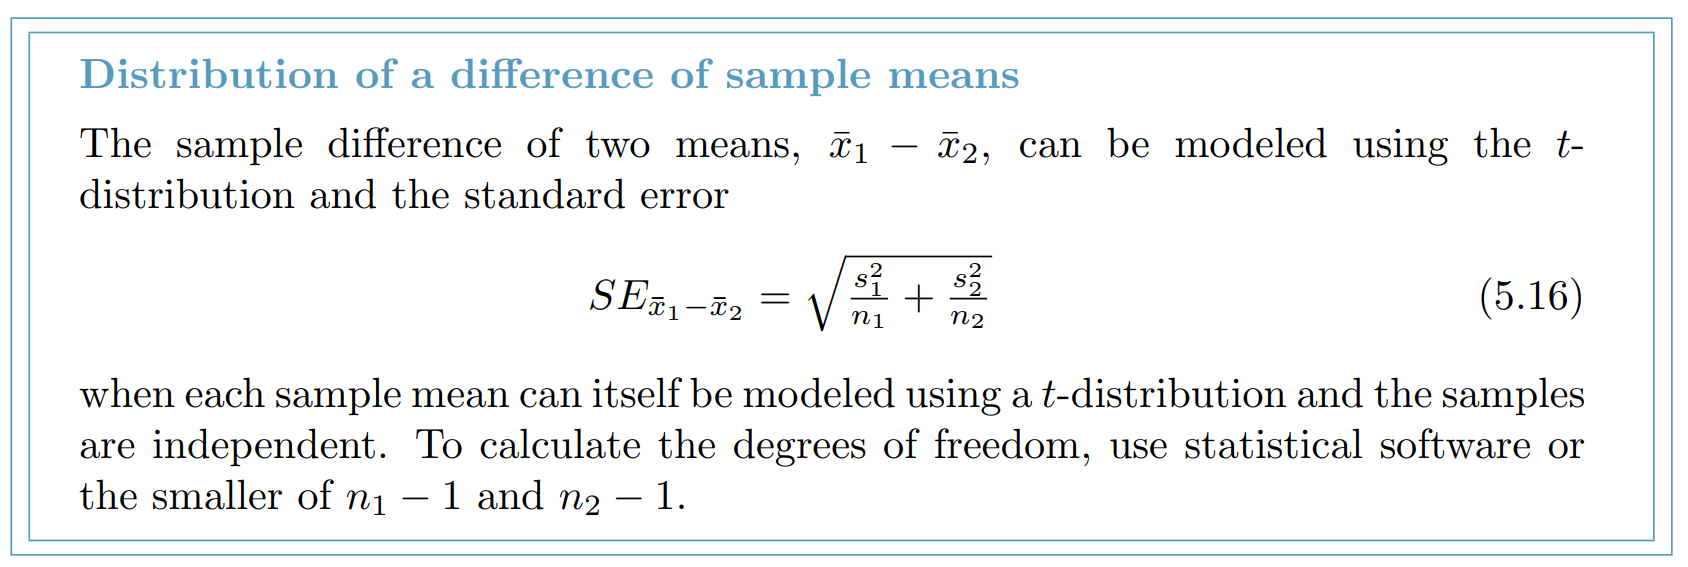

In [22]:
std_sq_seaside = standard_deviation_seaside * standard_deviation_seaside


std_sq_inland = standard_deviation_inland  * standard_deviation_inland


seaside_se = std_sq_seaside/mean_seaside_df.shape[0]

inland_se = std_sq_inland/mean_inland_df.shape[0]

se_seaside_minus_inland = math.sqrt( (seaside_se + inland_se) )
print("The SE of two group is %.4f" %se_seaside_minus_inland)

The SE of two group is 1212.7730


#### Step4.3) Using scipy to check hypothesis

In [23]:
# get the size of seaside group
seaside_sample.shape[0]

565

In [24]:
# get the size of inland group
inland_sample.shape[0]

1067

In [25]:
# to do the t-statistic and to calculate p-value
(statistic, pvalue) = stats.ttest_ind_from_stats(mean1=mean_seaside, std1=standard_deviation_seaside, nobs1=seaside_sample.shape[0], 
                                                 mean2=mean_inland, std2=standard_deviation_inland, nobs2=inland_sample.shape[0])

print ("t statistic is: ", statistic)
print ("pvalue is: ", pvalue)

t statistic is:  -0.23409625788387078
pvalue is:  0.8149396493520926


In [26]:
# reject or accept null hypothesis
if(pvalue) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

accept null hypothesis


#### Conclusion

We let the α = 0.05. We got the P-value is greater than 0.05, so we failed to reject Null-Hypothesis and we have sufficient evidence to reject Alternative-Hypothesis.


There were no significant differences between the wildfires of seaside counties and the wildfires of inland counties.

